In [1]:
import json
import os
import random
import numpy as np
from tqdm import tqdm

import torch
from tqdm import tqdm
import random
import seaborn as sns
from pylab import rcParams

from SkeletonData.data import *
from SkeletonData.array_segment import *

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

In [2]:
import gc
gc.collect()

0

In [3]:
with open("E:\\FYP_Data\\NTU120\\shapes_keys.json","r") as f0:
    id2shapes = json.load(f0)

### Add Skeleton of selected videos

In [4]:
#action_npz_file = "../data/skeleton_k10_v7_ movements.npz"
#action_arr = np.load(action_npz_file)

In [5]:
#for cls,arr,vid_n in zip(action_arr["arr_0"],action_arr["arr_1"],action_arr["arr_2"]):
#    os.makedirs(os.path.join(npz_files,f"{cls}"),exist_ok=True)
#    np.savez(os.path.join(npz_files,f"{cls}/{vid_n}.npz"),coords)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Sequence Data

In [7]:
root_dir = "D:\\FYP\\HAR-ZSL-XAI\\AETraining"
main_dir = "D:\\FYP\\HAR-ZSL-XAI"
data_dir = os.path.join("E:\\FYP_Data\\NTU120\skel\\nturgbd_skeletons_s001_to_s032\\nturgb+d_skeletons")
remove_files = ["E:\\FYP_Data\\NTU120\\skel\\NTU_RGBD120_samples_with_missing_skeletons.txt","E:\\FYP_Data\\NTU120\\skel\\NTU_RGBD_samples_with_missing_skeletons.txt"]
refined_data = os.path.join(main_dir,"data","sequence_data","midpoint_50f")
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 1-train_ratio - val_ratio
batch_size = 32

In [8]:
class_names = list(range(120))

In [9]:
files_to_remove = set()
for __f in remove_files:
    with open(__f,"r") as f0:
        for val in f0.read().split("\n"):
            files_to_remove.add(val)

In [10]:
len(files_to_remove)

535

In [11]:
total_files = set([x.split(".")[0] for x in os.listdir(data_dir)]) - files_to_remove

In [12]:
total_files_loc = set([f"{os.path.join(data_dir,x)}.skeleton" for x in total_files])

In [13]:
len(total_files)

113945

In [14]:
builder = SkeletonFileBuilder(file_names=total_files_loc)
file_iterator = iter(builder)

for data in file_iterator:
    split_array_from_builder(refined_data,id2shapes, data)
    break

In [15]:
from SkeletonData.array_segment import *
from SkeletonData.visualize import *

In [16]:
from functools import partial
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor

os.makedirs(refined_data,exist_ok=True)
#for each_file in tqdm(files,desc="Files Used",total=len(files)):
with ThreadPoolExecutor() as executor:
    file_loc = list(tqdm(executor.map(partial(split_array_from_builder,refined_data,id2shapes),file_iterator), total=len(file_iterator),desc="Processed Files:"))

Processed Files:: 100%|██████████| 113945/113945 [1:30:14<00:00, 21.04it/s]  


In [11]:
class_per_file = [x.split("_cls_")[0] for x in os.listdir(refined_data)]

In [12]:
unique_val,unique_count = np.unique(class_per_file,return_counts=True)

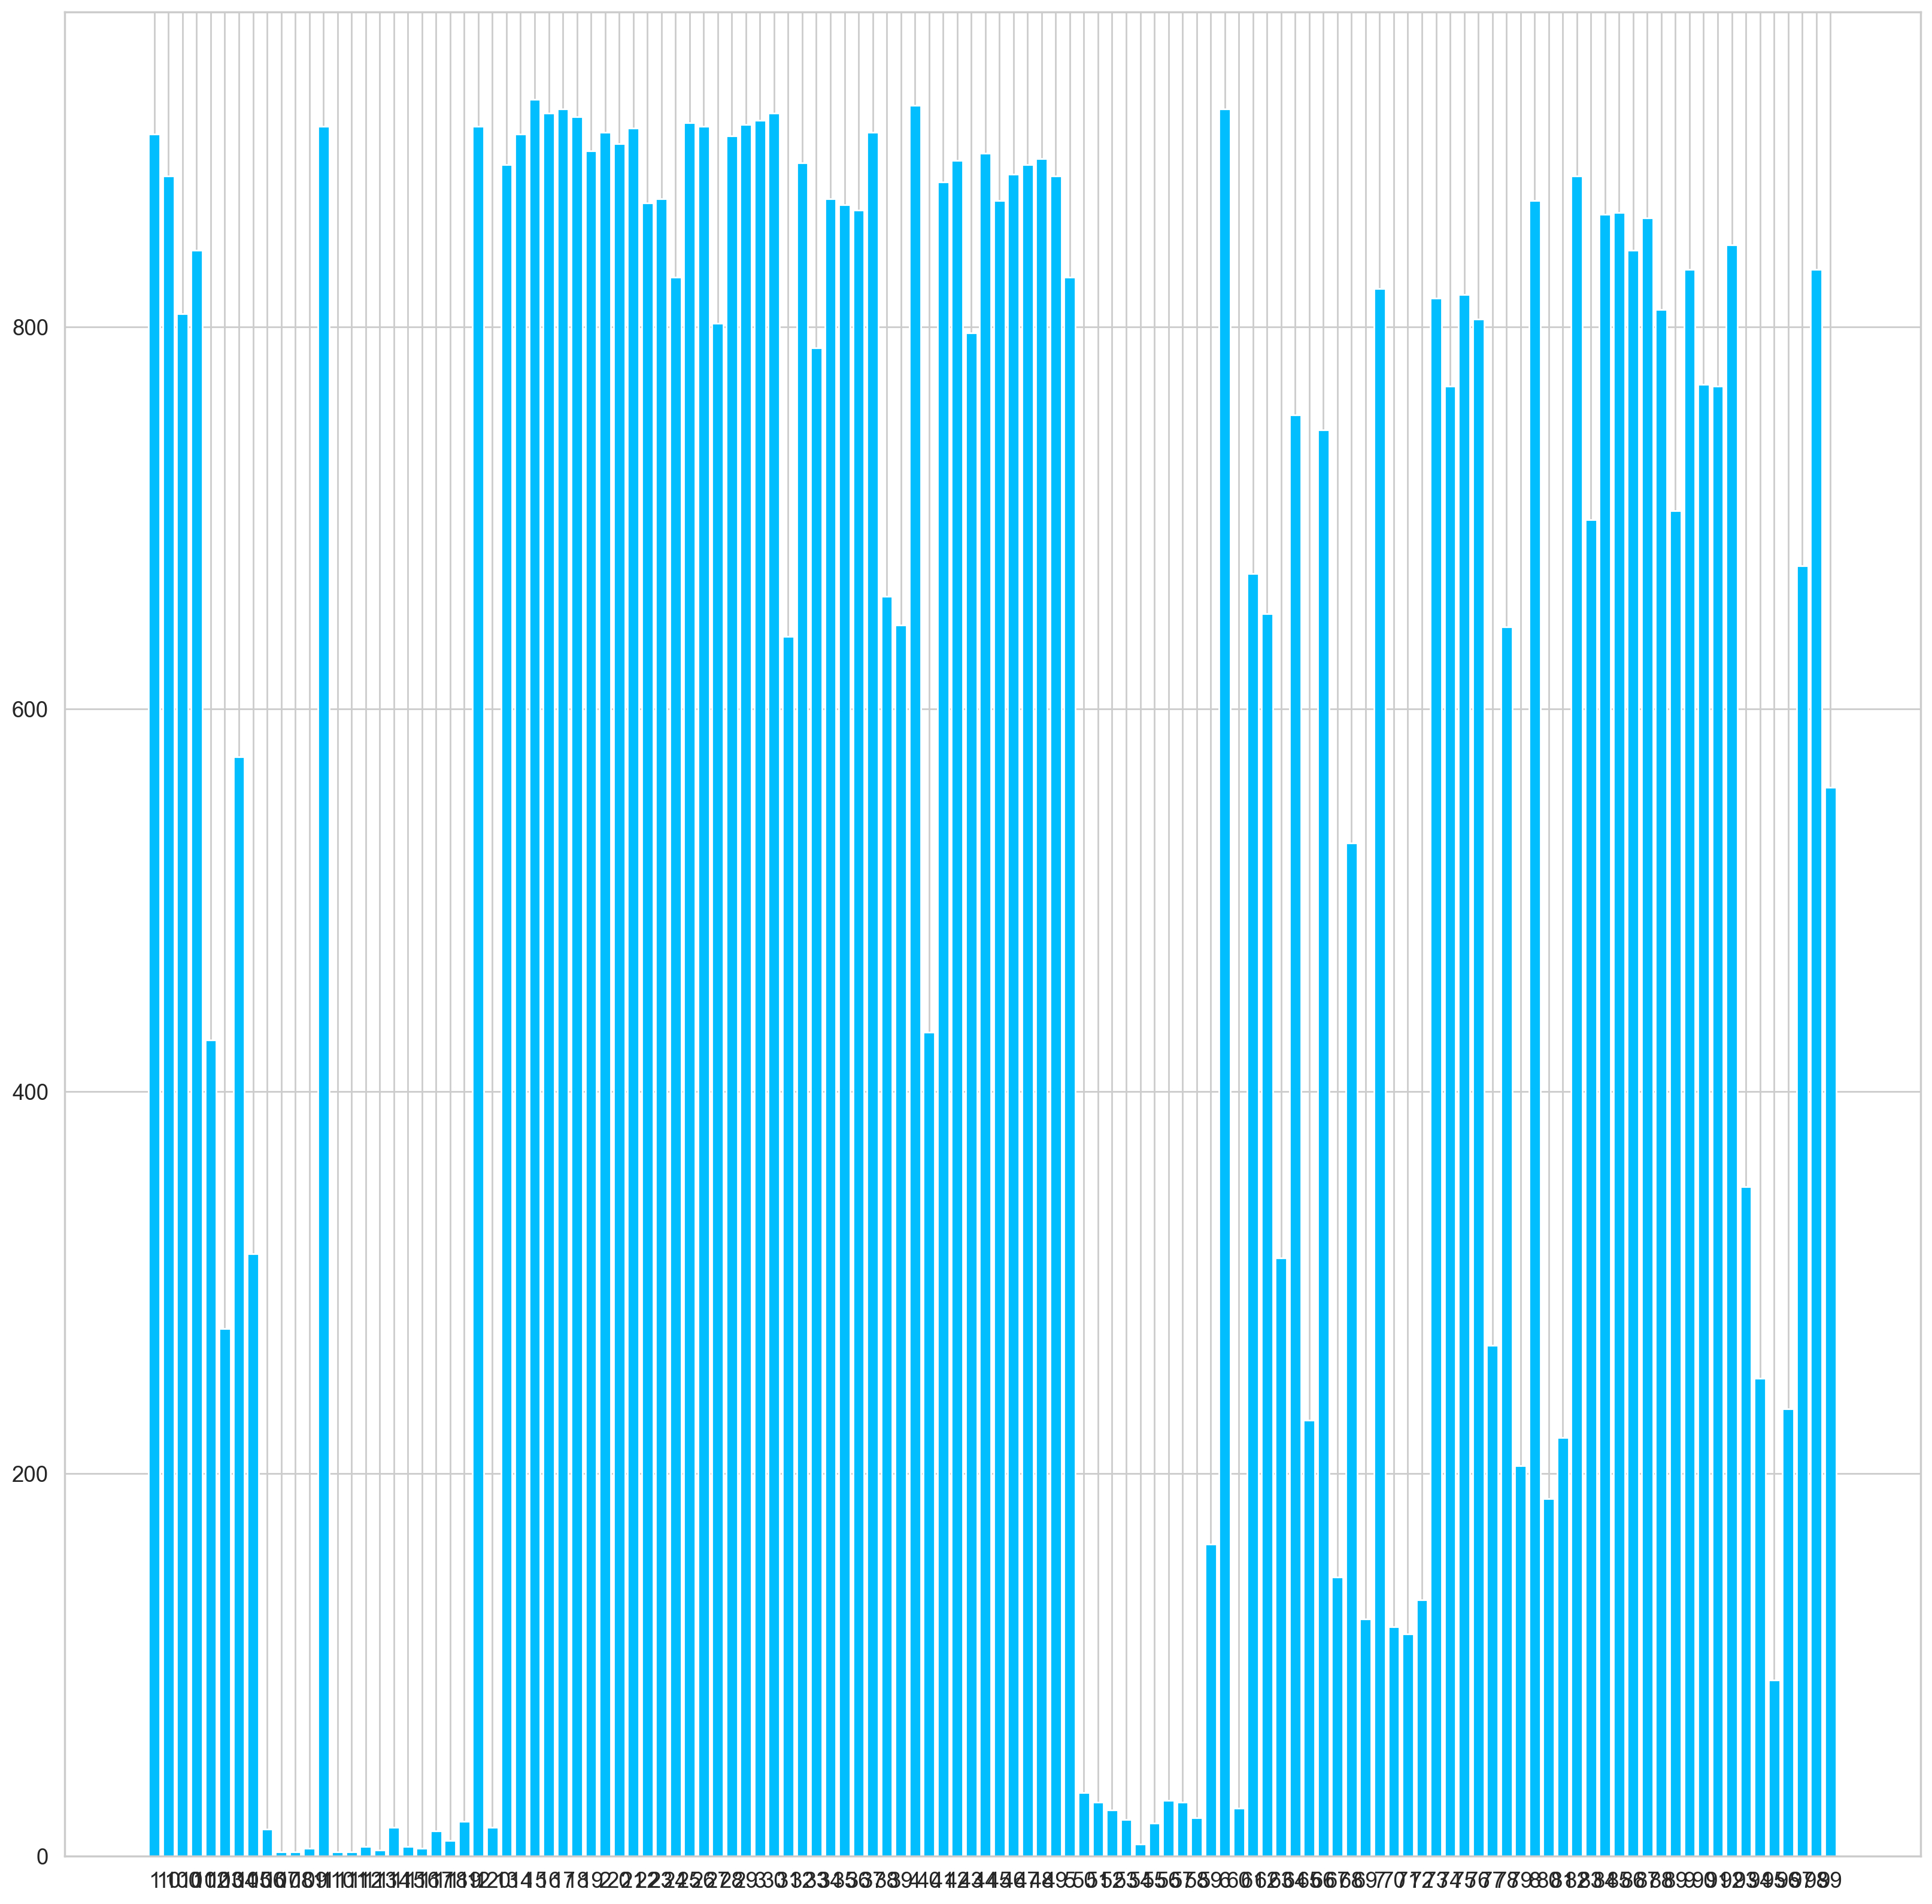

In [13]:
import pandas as pd
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20, 20))

plt.bar(unique_val, unique_count)

# Show Plot
plt.show()